In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [6]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
# size = 15 * 1
print(x_train.size)

15


In [14]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# print parameters
module_parameters = filter(lambda p: p.requires_grad, model.parameters())
param_cnt = sum([np.prod(p.size()) for p in module_parameters])
print('total trainable params: %d' % param_cnt)

total trainable params: 2


In [13]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    outpus = model(inputs)
    loss = criterion(outpus, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 3.7195
Epoch [10/60], Loss: 1.6449
Epoch [15/60], Loss: 0.8043
Epoch [20/60], Loss: 0.4637
Epoch [25/60], Loss: 0.3256
Epoch [30/60], Loss: 0.2696
Epoch [35/60], Loss: 0.2468
Epoch [40/60], Loss: 0.2374
Epoch [45/60], Loss: 0.2336
Epoch [50/60], Loss: 0.2319
Epoch [55/60], Loss: 0.2311
Epoch [60/60], Loss: 0.2307


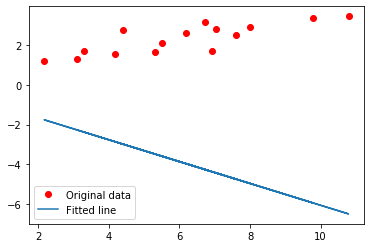

In [15]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')